In [1]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"


In [2]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_citizen""" ).df()
df = df.drop(columns= 'geom')
con.close()

In [3]:
#df.head()

In [4]:
df.shape


(44453, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   gbifID                            44453 non-null  int64         
 1   occurrenceID                      44453 non-null  object        
 2   publishingOrgKey                  44453 non-null  object        
 3   kingdom                           44453 non-null  object        
 4   phylum                            44453 non-null  object        
 5   class                             44453 non-null  object        
 6   order                             44453 non-null  object        
 7   family                            44453 non-null  object        
 8   genus                             44453 non-null  object        
 9   species                           44453 non-null  object        
 10  taxonRank                         44453 non-nu

In [6]:
df.describe()

,gbifID,taxonKey,day,month,year,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,media_count,observed_on,num_identification_agreements,num_identification_disagreements,description_length
count,4.445300e+04,4.445300e+04,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44103.000000,44453,44453.000000,44453.000000,3835.0
mean,4.305149e+09,4.114342e+06,15.503611,6.502238,2022.348458,45.504036,-72.554767,49.580748,1.811441,2022-11-05 00:28:59.545137,1.288822,0.006479,56.757236
min,8.910220e+08,2.650633e+06,1.000000,5.000000,2011.000000,45.014886,-74.503593,0.000000,1.000000,2011-05-01 00:00:00,0.000000,0.000000,1.0
25%,3.785138e+09,2.888763e+06,7.000000,6.000000,2021.000000,45.298086,-73.261628,2.000000,1.000000,2021-06-16 00:00:00,1.000000,0.000000,22.0
50%,4.522694e+09,3.120060e+06,15.000000,7.000000,2023.000000,45.420311,-72.649174,6.000000,1.000000,2023-07-06 00:00:00,1.000000,0.000000,42.0
75%,5.166933e+09,5.341297e+06,24.000000,7.000000,2025.000000,45.560980,-71.977290,29.000000,2.000000,2025-05-05 00:00:00,1.000000,0.000000,63.0
max,5.868425e+09,1.220746e+07,31.000000,8.000000,2025.000000,46.817932,-70.230866,999.000000,37.000000,2025-08-31 00:00:00,7.000000,2.000000,655.0
std,1.005814e+09,1.856381e+06,9.098905,1.080065,2.702038,0.374828,0.786790,123.237694,1.535219,NaN,0.584158,0.082170,65.51658


In [7]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,eventDate,recordedBy,issue,url,image_url,description
count,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,3835
unique,44451,2,1,1,5,44,137,572,1325,1,1332,41937,2397,7,44451,44443,2503
top,https://www.inaturalist.org/observations/53731259,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Onoclea sensibilis L.,2014-08-23,Vincent Laurie,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/53731259,https://inaturalist-open-data.s3.amazonaws.com...,"Parc National du Mont St Bruno, Quebec, Canada"
freq,2,44451,44453,44453,32510,4762,4516,1672,743,44453,743,16,3005,41598,2,3,110


In [8]:
df.isnull().sum()

gbifID                                  0
occurrenceID                            0
publishingOrgKey                        0
kingdom                                 0
phylum                                  0
class                                   0
order                                   0
family                                  0
genus                                   0
species                                 0
taxonRank                               0
taxonKey                                0
scientificName                          0
eventDate                               0
day                                     0
month                                   0
year                                    0
recordedBy                              0
decimalLatitude                         0
decimalLongitude                        0
issue                                   0
coordinateUncertaintyInMeters           0
media_count                           350
observed_on                       

In [9]:
df.duplicated().sum()
#df.drop_duplicates(inplace= True)

0

<Axes: xlabel='coordinateUncertaintyInMeters', ylabel='Count'>

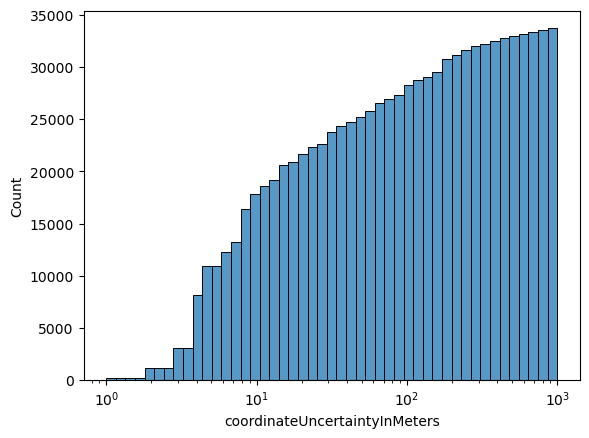

In [10]:
sns.histplot( df, x = 'coordinateUncertaintyInMeters', log_scale= True, cumulative=True)

In [11]:
q3 = df['coordinateUncertaintyInMeters'].quantile(0.90)
print(q3)

157.0


<Axes: xlabel='month', ylabel='Count'>

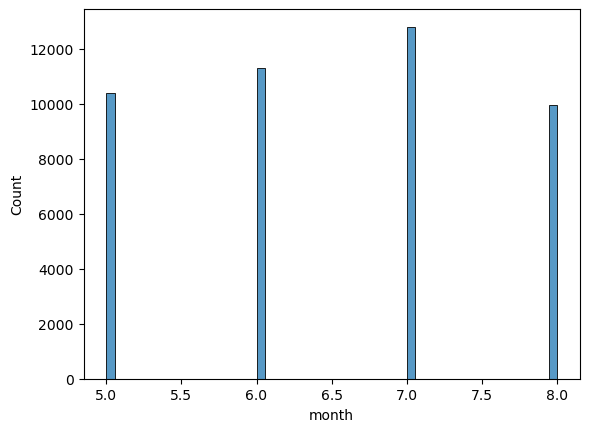

In [12]:
sns.histplot( df, x = 'month')